In [325]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting the data for visualization
import seaborn as sns #For making Statiscal graphs 
sns.set()

import re
import nltk
from nltk.corpus import stopwords #for removing stop words
from nltk.stem.porter import PorterStemmer #used for stemming
from wordcloud import WordCloud
from collections import Counter
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/new-york-city-current-job-postings/NYC Jobs Data Dictionary_Sep17.xlsx
/kaggle/input/new-york-city-current-job-postings/socrata_metadata.json
/kaggle/input/new-york-city-current-job-postings/nyc-jobs.csv


In [326]:
data = pd.read_csv('/kaggle/input/new-york-city-current-job-postings/nyc-jobs.csv')

In [327]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3258 entries, 0 to 3257
Data columns (total 28 columns):
Job ID                           3258 non-null int64
Agency                           3258 non-null object
Posting Type                     3258 non-null object
# Of Positions                   3258 non-null int64
Business Title                   3258 non-null object
Civil Service Title              3258 non-null object
Title Code No                    3258 non-null object
Level                            3258 non-null object
Job Category                     3256 non-null object
Full-Time/Part-Time indicator    2989 non-null object
Salary Range From                3258 non-null float64
Salary Range To                  3258 non-null float64
Salary Frequency                 3258 non-null object
Work Location                    3258 non-null object
Division/Work Unit               3258 non-null object
Job Description                  3258 non-null object
Minimum Qual Requirements    

Count of Missing Values present in the data

In [328]:
print(data.shape)

data.isnull().sum()

(3258, 28)


Job ID                              0
Agency                              0
Posting Type                        0
# Of Positions                      0
Business Title                      0
Civil Service Title                 0
Title Code No                       0
Level                               0
Job Category                        2
Full-Time/Part-Time indicator     269
Salary Range From                   0
Salary Range To                     0
Salary Frequency                    0
Work Location                       0
Division/Work Unit                  0
Job Description                     0
Minimum Qual Requirements          16
Preferred Skills                  433
Additional Information           1260
To Apply                            1
Hours/Shift                      2252
Work Location 1                  1745
Recruitment Contact              3258
Residency Requirement               0
Posting Date                        0
Post Until                       2226
Posting Upda

In [329]:
data = data.drop(['Recruitment Contact','Post Until'], axis = 1) # removing the column which has a lot of missing data.

In [330]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3258 entries, 0 to 3257
Data columns (total 26 columns):
Job ID                           3258 non-null int64
Agency                           3258 non-null object
Posting Type                     3258 non-null object
# Of Positions                   3258 non-null int64
Business Title                   3258 non-null object
Civil Service Title              3258 non-null object
Title Code No                    3258 non-null object
Level                            3258 non-null object
Job Category                     3256 non-null object
Full-Time/Part-Time indicator    2989 non-null object
Salary Range From                3258 non-null float64
Salary Range To                  3258 non-null float64
Salary Frequency                 3258 non-null object
Work Location                    3258 non-null object
Division/Work Unit               3258 non-null object
Job Description                  3258 non-null object
Minimum Qual Requirements    

# Data Cleaning

 we have only 4 continiuous variables(Job Id, # of Positions, Salary Range From, Salary Range To), rest all are categorical Variables.

In [331]:
data.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Minimum Qual Requirements,Preferred Skills,Additional Information,To Apply,Hours/Shift,Work Location 1,Residency Requirement,Posting Date,Posting Updated,Process Date
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,...,1.\tA baccalaureate degree from an accredited ...,â€¢\tExcellent interpersonal and organizationa...,"Salary range for this position is: $42,405 - $...",NaN,NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,2011-06-24T00:00:00.000,2019-09-10T00:00:00.000
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,1. A baccalaureate degree from an accredited c...,NaN,NaN,"In addition to applying through this website, ...",NaN,NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,2012-01-26T00:00:00.000,2019-09-10T00:00:00.000
2,132292,NYC HOUSING AUTHORITY,Internal,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,2013-12-12T00:00:00.000,2019-09-10T00:00:00.000
3,132292,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,2013-12-12T00:00:00.000,2019-09-10T00:00:00.000
4,133921,NYC HOUSING AUTHORITY,Internal,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,...,1. Five years of full-time satisfactory experi...,NaN,SPECIAL NOTE: 1. This is a temporary assig...,"Click the ""Apply Now"" button.",NaN,NaN,NYCHA has no residency requirement.,2014-01-09T00:00:00.000,2014-01-08T00:00:00.000,2019-09-10T00:00:00.000


In [332]:

print(data.columns)

Index(['Job ID', 'Agency', 'Posting Type', '# Of Positions', 'Business Title',
       'Civil Service Title', 'Title Code No', 'Level', 'Job Category',
       'Full-Time/Part-Time indicator', 'Salary Range From', 'Salary Range To',
       'Salary Frequency', 'Work Location', 'Division/Work Unit',
       'Job Description', 'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Hours/Shift', 'Work Location 1',
       'Residency Requirement', 'Posting Date', 'Posting Updated',
       'Process Date'],
      dtype='object')


In [333]:
# cleaning the data by removing the rows that has missing values in the columns below

#data = data.dropna(subset = ['Job Category','Minimum Qual Requirements','To Apply'])
data.dropna(subset = ['Job Category','Minimum Qual Requirements','To Apply'],inplace=True)

Note that the row index of the dataframe is changed and we need to use pandas reset_index().Now the row index starts from 0 and also note that pandas reset_index() keeps the original row index as a new column with the name index.
# 
# Often you don’t need the extra column with original row index. We can specify pandas to not to keep the original index with the argument drop=True
# 
# And I wanted to reset index to zero in place, I also added the inplace=True argument.

In [334]:
data.reset_index(drop=True,inplace=True)

In [335]:
# defining the WordCloud function

FIGSIZE = (10,8)

def generate_wordCloud(words):
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white').generate(words)
    plt.figure(figsize= FIGSIZE)
    plt.imshow(wordcloud,interpolation="bilinear") 
    plt.axis("off") 
    #plt.tight_layout(pad = 0) 
  
    plt.show()

# Number of Agencies Posting the Job

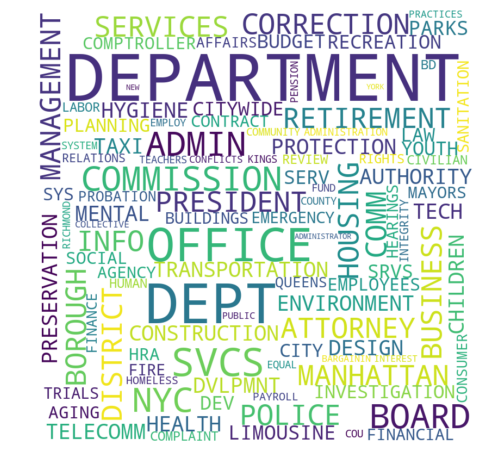

In [336]:
Agencies_posting = data['Agency'].value_counts()

#print(Agencies_posting)
#Word Cloud of agencies that keep more postings

generate_wordCloud(' '.join(Agencies_posting.index.tolist()))

 # Checking the Full time and PartTime Openings


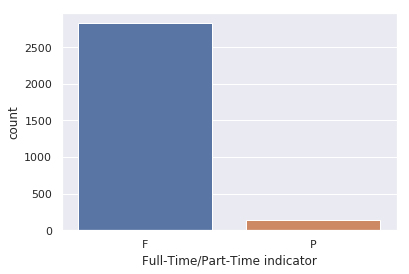

In [337]:
sns.countplot(x = 'Full-Time/Part-Time indicator', data = data)

Now I want to check the count of agencies that are offering Full time Jobs, along with their Posting Type

Agency                          Posting Type
ADMIN FOR CHILDREN'S SVCS       External        42
                                Internal        80
ADMIN TRIALS AND HEARINGS       External        10
                                Internal        10
BOARD OF CORRECTION             External         3
                                                ..
PRESIDENT BOROUGH OF MANHATTAN  Internal         2
PUBLIC ADMINISTRATOR-NEW YORK   Internal         1
TAXI & LIMOUSINE COMMISSION     External        44
                                Internal        46
TEACHERS RETIREMENT SYSTEM      Internal         5
Name: Full-Time/Part-Time indicator, Length: 100, dtype: int64


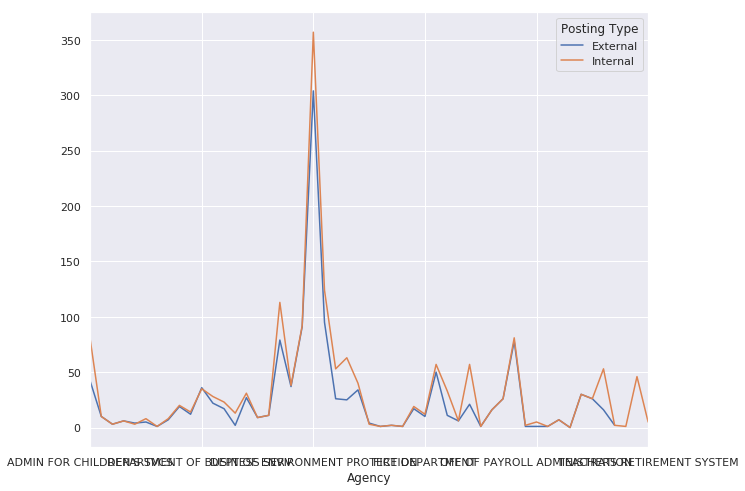

In [338]:
df1 = data[['Agency','Full-Time/Part-Time indicator','Posting Type']]

count = df1.groupby(['Agency','Posting Type'])['Full-Time/Part-Time indicator'].count()

print(count)

fig, ax = plt.subplots(figsize=FIGSIZE)
count.unstack().plot(ax = ax)

****

# Business Titles Agencies are loooking for

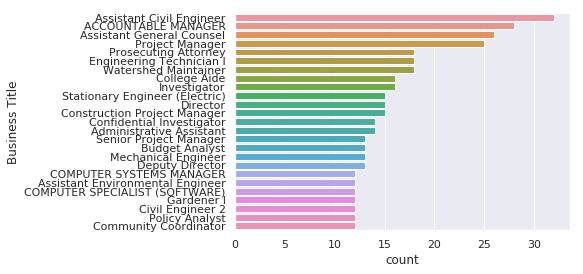

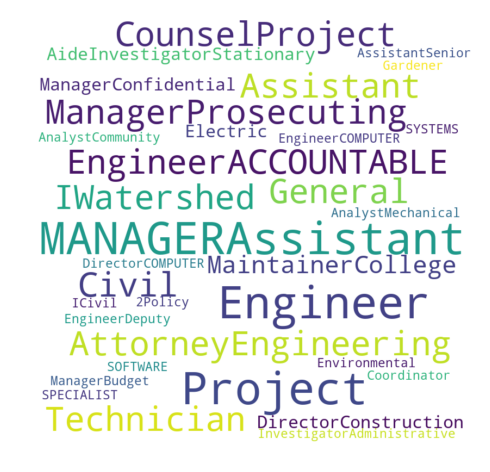

In [339]:
btitle_counts = data['Business Title'].value_counts()
#print(title_counts)

important_btitles = btitle_counts.iloc[:25]

sns.countplot(y = data['Business Title'],order = important_btitles.index)

#word cloud showing the imporatant civil service Titles
generate_wordCloud(''.join(important_btitles.index.tolist()))

# Civil Service Titles Agencies are looking for

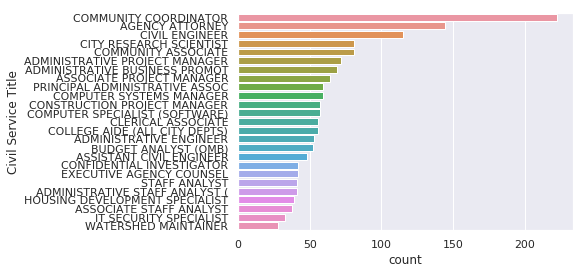

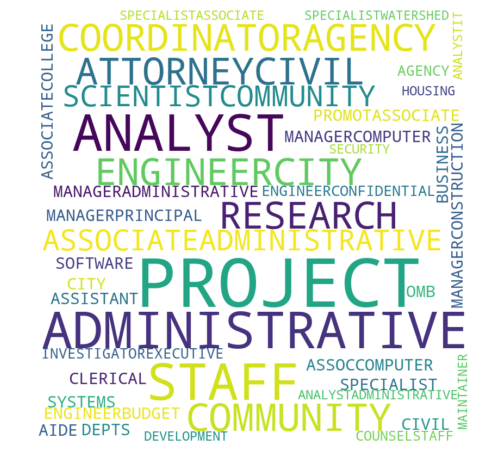

In [340]:
title_counts = data['Civil Service Title'].value_counts()
#print(title_counts)

important_titles = title_counts.iloc[:25]

sns.countplot(y = data['Civil Service Title'],order = important_titles.index)

#word cloud showing the imporatant civil service Titles
generate_wordCloud(''.join(important_titles.index.tolist()))

# Getting the Important Job Categories

In [341]:
print(data['Job Category'].value_counts())

Engineering, Architecture, & Planning                                                                                                                             577
Technology, Data & Innovation                                                                                                                                     339
Legal Affairs                                                                                                                                                     224
Public Safety, Inspections, & Enforcement                                                                                                                         201
Building Operations & Maintenance                                                                                                                                 187
                                                                                                                                                                 ... 
Cler

In [342]:

def get_the_important_features(x,k):
    for i in range(len(x)):
        features = re.sub('&',',',x[i])
        features = features.lower()
        features = features.split(',')
        k.extend(features)

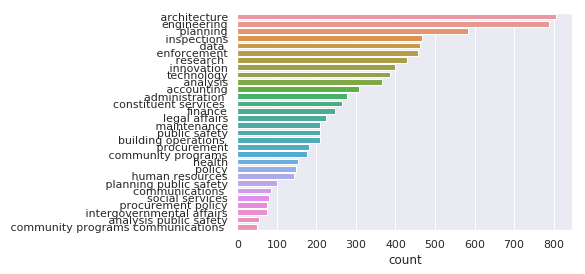

<Figure size 720x576 with 0 Axes>

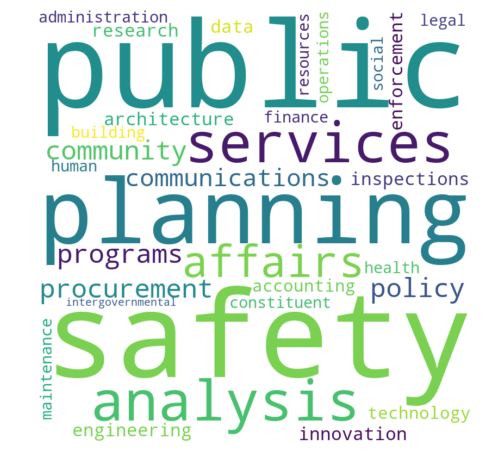

In [343]:
categories = []
get_the_important_features(data['Job Category'],k = categories)
#print(categories)

#for getting the import Job Categories:

popular_job_categories = pd.Series(categories)
popular_job_categories = popular_job_categories[popular_job_categories!=' ']
main_categories = popular_job_categories.value_counts().iloc[:30]

# Most Important Job categories
sns.countplot(y =popular_job_categories,order= main_categories.index)

plt.figure(figsize= FIGSIZE)
generate_wordCloud(' '.join(main_categories.index.tolist()))

In [344]:
data.iloc[:,3:20]

,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,Salary Range From,Salary Range To,Salary Frequency,Work Location,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,To Apply
0,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,51907.68,54580.32,Annual,Heating Mgt-Operations,Management Services Department,"Under direct supervision, assist in the routin...",1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button."
1,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,51907.68,54580.32,Annual,Heating Mgt-Operations,Management Services Department,"Under direct supervision, assist in the routin...",1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button."
2,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,35.00,35.00,Hourly,DMP-Contract & Analysis Unit,Dept of Management & Planning,Responsibilities of selected candidates will i...,1. Five years of full-time satisfactory experi...,NaN,SPECIAL NOTE: 1. This is a temporary assig...,"Click the ""Apply Now"" button."
3,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,35.00,35.00,Hourly,DMP-Contract & Analysis Unit,Dept of Management & Planning,Responsibilities of selected candidates will i...,1. Five years of full-time satisfactory experi...,NaN,SPECIAL NOTE: 1. This is a temporary assig...,"Click the ""Apply Now"" button."
4,1,Contract Analyst,PROCUREMENT ANALYST,12158,3,"Finance, Accounting, & Procurement",F,50598.00,85053.00,Annual,42-09 28th Street,HIV Administration,** OPEN TO PERMANENT PROCUREMENT ANALYSTS ONLY...,1. A baccalaureate degree from an accredited c...,Strong analytical background; advanced profic...,NaN,Apply online with a cover letter to https://a1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,1,"Assistant Chief Plan Examiner, Cranes & Derricks",CIVIL ENGINEER,20215,3,"Engineering, Architecture, & Planning Public S...",F,87490.00,100613.00,Annual,"280 Broadway, 5th Floor, N.Y.",Cranes & Derricks,The NYC Department of Buildings is responsible...,"(1) Four (4) years of full-time, satisfactory ...","Experience in crane operations, the design or ...",This position is open to qualified persons wit...,For Non-City/External Candidates: Visit the Ex...
3236,1,"Assistant Chief Plan Examiner, Cranes & Derricks",MECHANICAL ENGINEER,20415,3,"Engineering, Architecture, & Planning Public S...",F,87490.00,100613.00,Annual,"280 Broadway, 5th Floor, N.Y.",Cranes & Derricks,The NYC Department of Buildings is responsible...,"(1) Four (4) years of full-time, satisfactory ...","Experience in crane operations, the design or ...",This position is open to qualified persons wit...,For Non-City/External Candidates: Visit the Ex...
3237,1,"Assistant Chief Plan Examiner, Cranes & Derricks",MECHANICAL ENGINEER,20415,3,"Engineering, Architecture, & Planning Public S...",F,87490.00,100613.00,Annual,"280 Broadway, 5th Floor, N.Y.",Cranes & Derricks,The NYC Department of Buildings is responsible...,"(1) Four (4) years of full-time, satisfactory ...","Experience in crane operations, the design or ...",This position is open to qualified persons wit...,For Non-City/External Candidates: Visit the Ex...
3238,3,Mechanical Engineer,MECHANICAL ENGINEER,20415,2,"Engineering, Architecture, & Planning",F,78210.00,108657.00,Annual,"9 Metrotech Center, Brooklyn N",Technology Management,"The Fire Department, City of New York (FDNY), ...","(1) Four (4) years of full-time, satisfactory ...",A baccalaureate or Masterâ€™s degree in Mechan...,This position is open to applicants who are on...,NON

# Exploring the Salary Fields

In [345]:
salary_fields = data[['Business Title','Civil Service Title','Salary Range From','Salary Range To','Salary Frequency']]

In [346]:
salary_fields.head()

,Business Title,Civil Service Title,Salary Range From,Salary Range To,Salary Frequency
0,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,51907.68,54580.32,Annual
1,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,51907.68,54580.32,Annual
2,Temporary Painter,PAINTER,35.00,35.00,Hourly
3,Temporary Painter,PAINTER,35.00,35.00,Hourly
4,Contract Analyst,PROCUREMENT ANALYST,50598.00,85053.00,Annual


## Bussiness Titles having Highest Starting Salaries

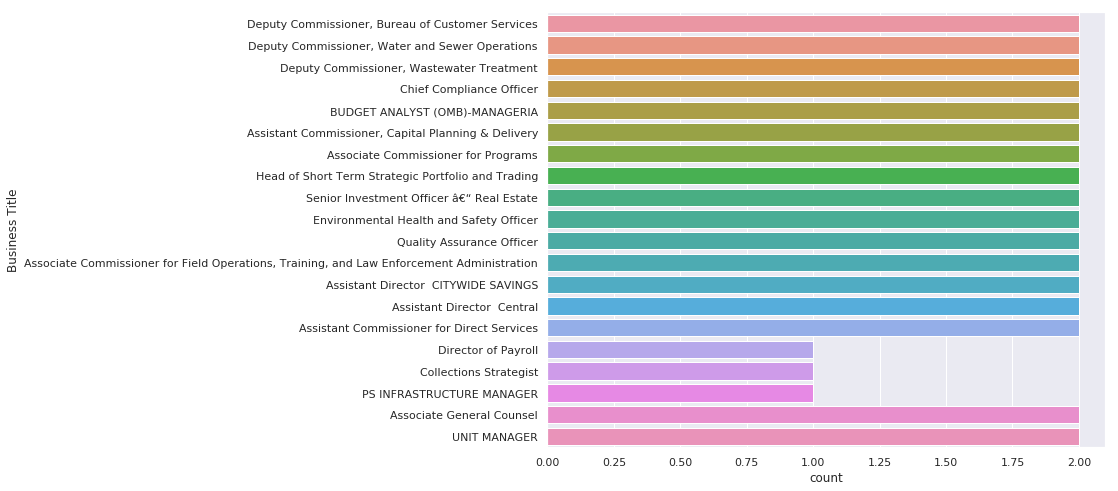

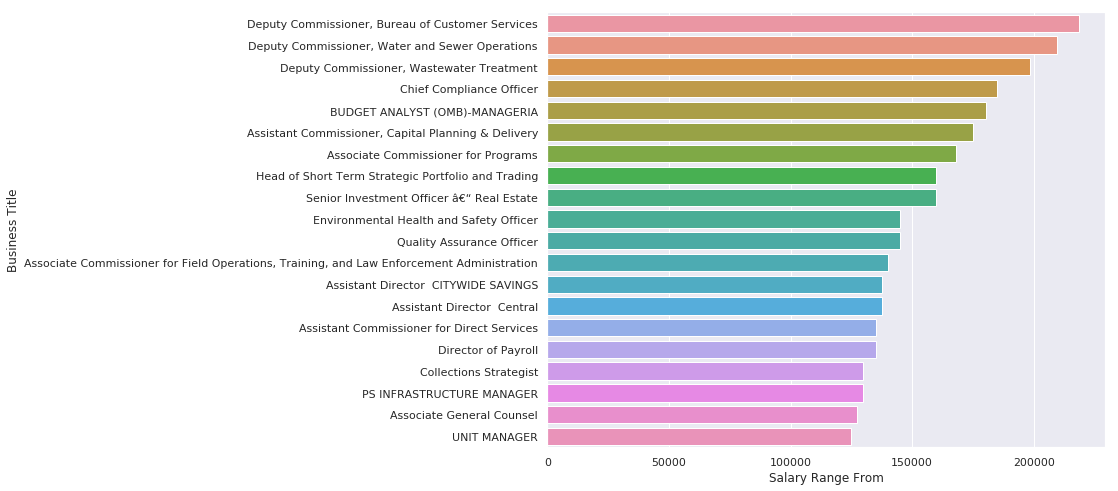

In [347]:


btitles_salary_starts_From = salary_fields.groupby(['Business Title'])['Salary Range From'].mean().nlargest(20)

# Available count of High Starting Salaries of the Bussiness Titiles
plt.figure(figsize = FIGSIZE)
sns.countplot(y = salary_fields['Business Title'],order = btitles_salary_starts_From.index)

# salaries
plt.figure(figsize = FIGSIZE)
sns.barplot(x= 'Salary Range From', y = 'Business Title',data = pd.DataFrame(btitles_salary_starts_From).reset_index() )

# Bussiness Titles having Highest Maximum Salaries

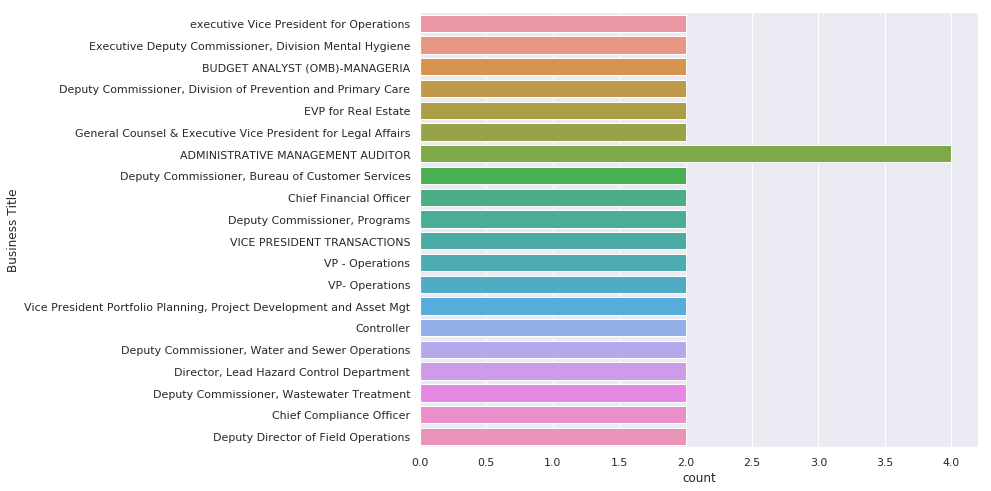

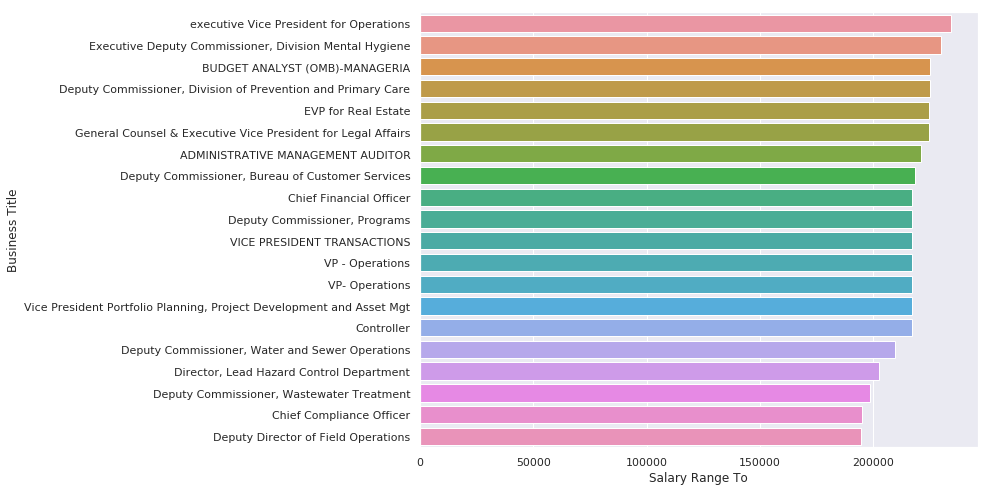

In [348]:
btitles_salary_starts_From = salary_fields.groupby(['Business Title'])['Salary Range To'].mean().nlargest(20)

# Available count of High Ending Salaries of the Bussiness Titiles
plt.figure(figsize = FIGSIZE)
sns.countplot(y = salary_fields['Business Title'],order = btitles_salary_starts_From.index)

# salaries
plt.figure(figsize = FIGSIZE)
sns.barplot(x= 'Salary Range To', y = 'Business Title',data = pd.DataFrame(btitles_salary_starts_From).reset_index() )

# Civil Service Titles having Highest Starting Salaries

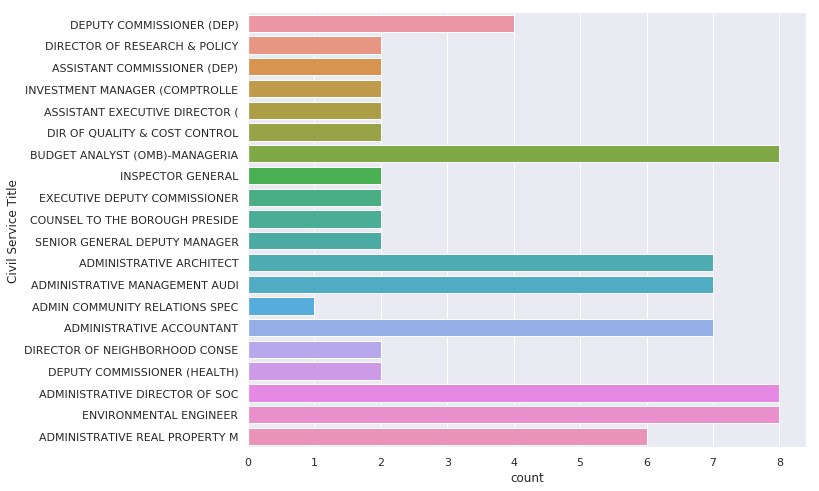

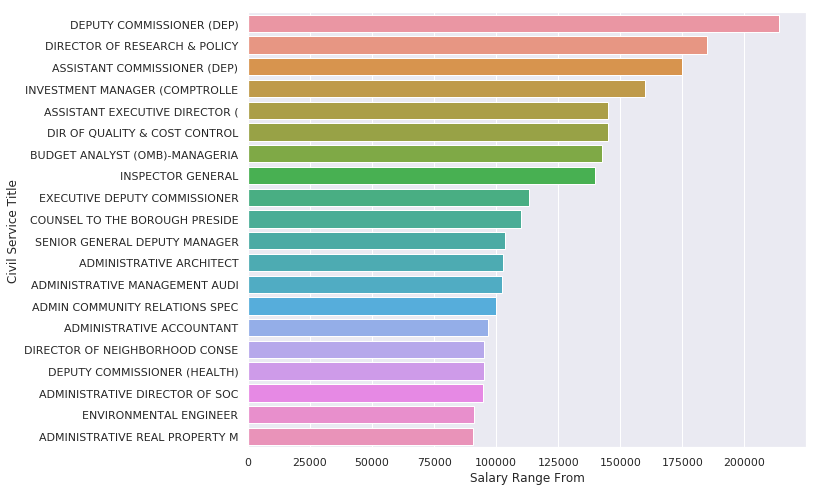

In [349]:
ctitles_salary_starts_From = salary_fields.groupby(['Civil Service Title'])['Salary Range From'].mean().nlargest(20)

# Available count of High Starting Salaries of the civil Titiles
plt.figure(figsize = FIGSIZE)
sns.countplot(y = salary_fields['Civil Service Title'],order = ctitles_salary_starts_From.index)

# salaries
plt.figure(figsize = FIGSIZE)
sns.barplot(x= 'Salary Range From', y = 'Civil Service Title',data = pd.DataFrame(ctitles_salary_starts_From).reset_index() )

# Civil Service having Highest Maximum Salaries

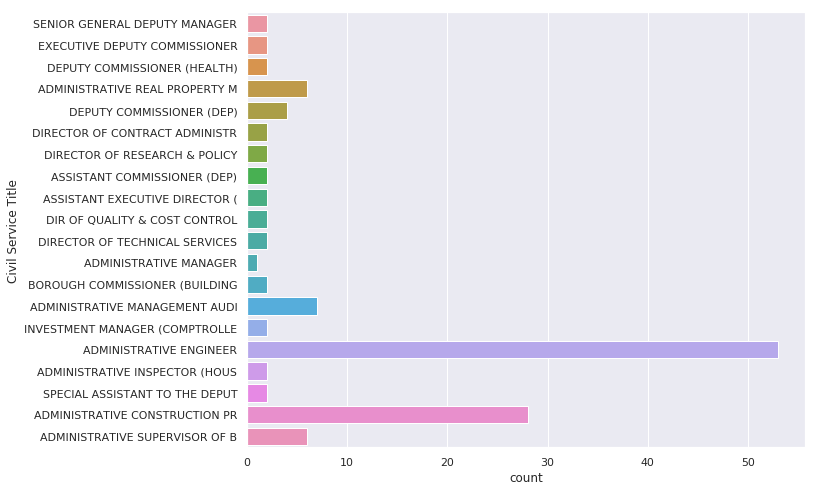

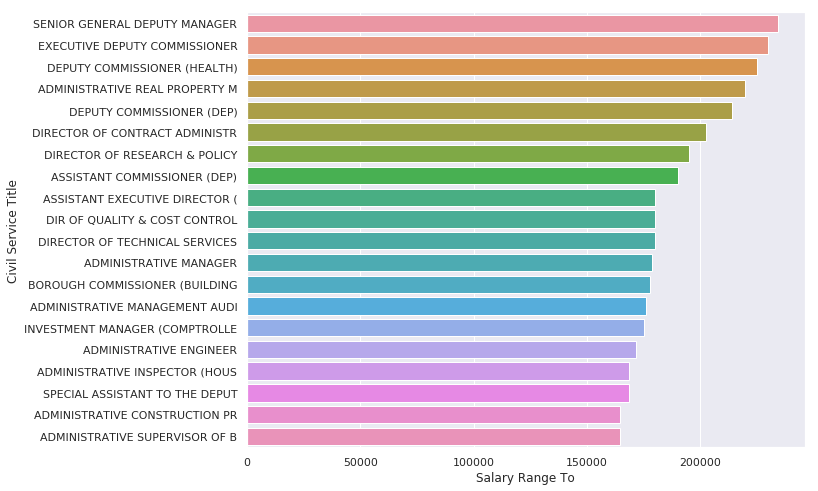

In [350]:
ctitles_salary_starts_From = salary_fields.groupby(['Civil Service Title'])['Salary Range To'].mean().nlargest(20)

# Available count of High Starting Salaries of the civil Titiles
plt.figure(figsize = FIGSIZE)
sns.countplot(y = salary_fields['Civil Service Title'],order = ctitles_salary_starts_From.index)

# salaries
plt.figure(figsize = FIGSIZE)
sns.barplot(x= 'Salary Range To', y = 'Civil Service Title',data = pd.DataFrame(ctitles_salary_starts_From).reset_index() )

# Hourly Paying Bussiness Title Jobs(Highest)

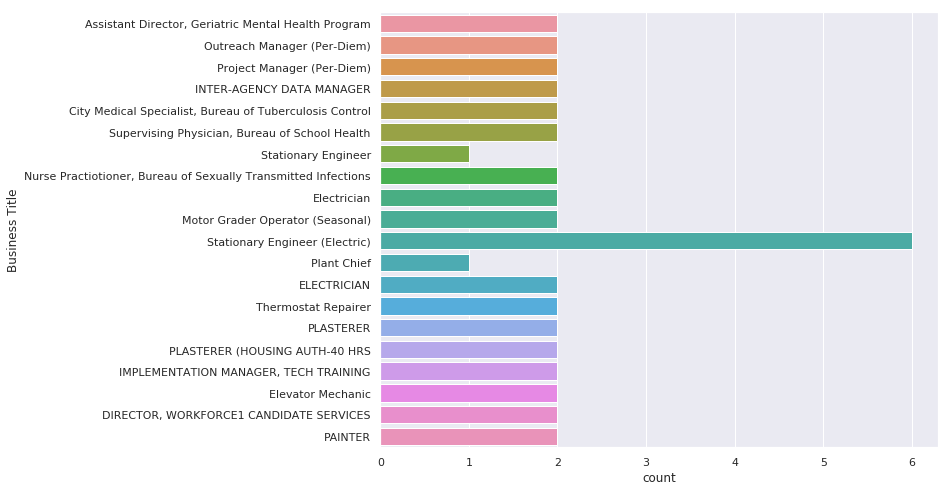

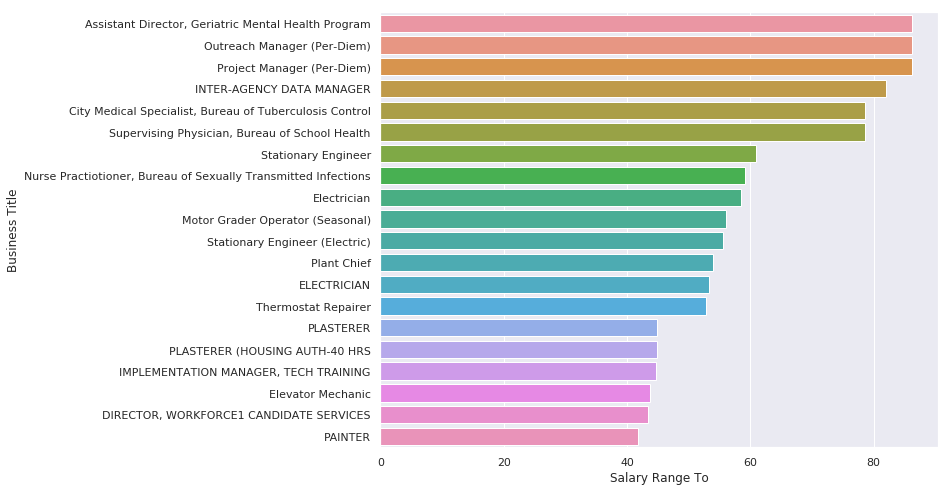

In [351]:
salary_fields_Hourly = salary_fields[salary_fields['Salary Frequency'] == 'Hourly']


Hourly_salary_pay= salary_fields_Hourly.groupby(['Business Title'])['Salary Range To'].mean().nlargest(20)

#Available count of High Starting Salaries of the civil Titiles
plt.figure(figsize = FIGSIZE)
sns.countplot(y = salary_fields_Hourly['Business Title'],order = Hourly_salary_pay.index)

# salaries
plt.figure(figsize = FIGSIZE)
sns.barplot(x= 'Salary Range To', y = 'Business Title',data = pd.DataFrame(Hourly_salary_pay).reset_index())

# Hourly Paying Civil Title Jobs(Highest)

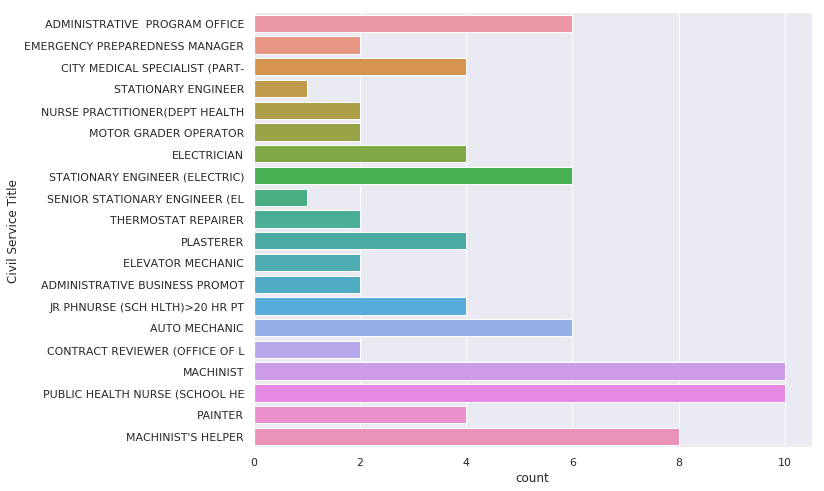

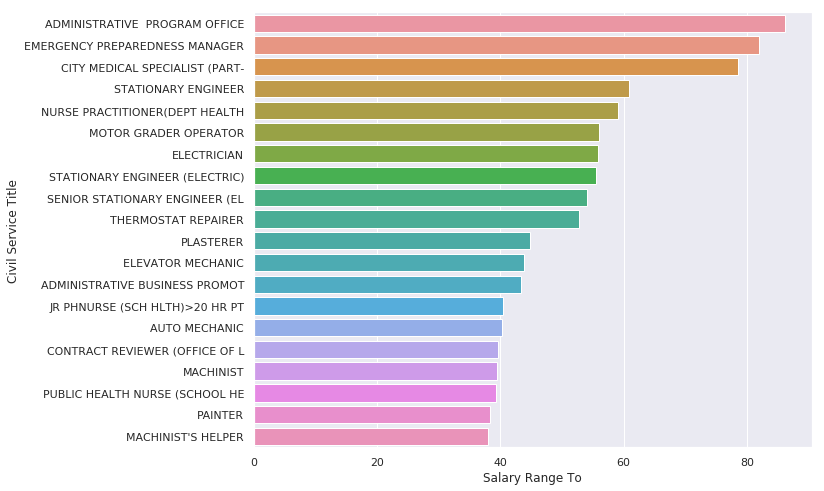

In [352]:
salary_fields_Hourly = salary_fields[salary_fields['Salary Frequency'] == 'Hourly']


Hourly_salary_pay= salary_fields_Hourly.groupby(['Civil Service Title'])['Salary Range To'].mean().nlargest(20)

#Available count of High Starting Salaries of the civil Titiles
plt.figure(figsize = FIGSIZE)
sns.countplot(y = salary_fields_Hourly['Civil Service Title'],order = Hourly_salary_pay.index)

# salaries
plt.figure(figsize = FIGSIZE)
sns.barplot(x= 'Salary Range To', y = 'Civil Service Title',data = pd.DataFrame(Hourly_salary_pay).reset_index())

In [353]:
data.iloc[:,7:20]

,Level,Job Category,Full-Time/Part-Time indicator,Salary Range From,Salary Range To,Salary Frequency,Work Location,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,To Apply
0,0,Maintenance & Operations,F,51907.68,54580.32,Annual,Heating Mgt-Operations,Management Services Department,"Under direct supervision, assist in the routin...",1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button."
1,0,Maintenance & Operations,F,51907.68,54580.32,Annual,Heating Mgt-Operations,Management Services Department,"Under direct supervision, assist in the routin...",1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button."
2,0,Maintenance & Operations,F,35.00,35.00,Hourly,DMP-Contract & Analysis Unit,Dept of Management & Planning,Responsibilities of selected candidates will i...,1. Five years of full-time satisfactory experi...,NaN,SPECIAL NOTE: 1. This is a temporary assig...,"Click the ""Apply Now"" button."
3,0,Maintenance & Operations,F,35.00,35.00,Hourly,DMP-Contract & Analysis Unit,Dept of Management & Planning,Responsibilities of selected candidates will i...,1. Five years of full-time satisfactory experi...,NaN,SPECIAL NOTE: 1. This is a temporary assig...,"Click the ""Apply Now"" button."
4,3,"Finance, Accounting, & Procurement",F,50598.00,85053.00,Annual,42-09 28th Street,HIV Administration,** OPEN TO PERMANENT PROCUREMENT ANALYSTS ONLY...,1. A baccalaureate degree from an accredited c...,Strong analytical background; advanced profic...,NaN,Apply online with a cover letter to https://a1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,3,"Engineering, Architecture, & Planning Public S...",F,87490.00,100613.00,Annual,"280 Broadway, 5th Floor, N.Y.",Cranes & Derricks,The NYC Department of Buildings is responsible...,"(1) Four (4) years of full-time, satisfactory ...","Experience in crane operations, the design or ...",This position is open to qualified persons wit...,For Non-City/External Candidates: Visit the Ex...
3236,3,"Engineering, Architecture, & Planning Public S...",F,87490.00,100613.00,Annual,"280 Broadway, 5th Floor, N.Y.",Cranes & Derricks,The NYC Department of Buildings is responsible...,"(1) Four (4) years of full-time, satisfactory ...","Experience in crane operations, the design or ...",This position is open to qualified persons wit...,For Non-City/External Candidates: Visit the Ex...
3237,3,"Engineering, Architecture, & Planning Public S...",F,87490.00,100613.00,Annual,"280 Broadway, 5th Floor, N.Y.",Cranes & Derricks,The NYC Department of Buildings is responsible...,"(1) Four (4) years of full-time, satisfactory ...","Experience in crane operations, the design or ...",This position is open to qualified persons wit...,For Non-City/External Candidates: Visit the Ex...
3238,2,"Engineering, Architecture, & Planning",F,78210.00,108657.00,Annual,"9 Metrotech Center, Brooklyn N",Technology Management,"The Fire Department, City of New York (FDNY), ...","(1) Four (4) years of full-time, satisfactory ...",A baccalaureate or Masterâ€™s degree in Mechan...,This position is open to applicants who are on...,NON-CITY EMPLOYEES/EXTERNAL CANDIDATES PLEASE ...


# Popular Work Units

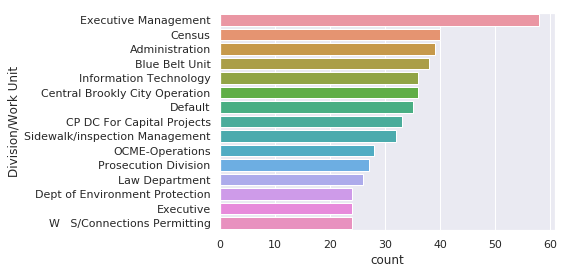

In [354]:
work_units = data['Division/Work Unit'].value_counts()[:15]

sns.countplot(y = data['Division/Work Unit'], order = work_units.index)

# Keywords in Job Desriptions

In [355]:
# function to get keywords from Description

def get_keywords(x, k):
    x = x.lower()
    tokens = nltk.word_tokenize(x)
    final_tokens = [w for w in tokens if not w in set(stopwords.words('english'))]
    k.extend(final_tokens)
   

In [356]:
job_kwords = []

data['Job Description'].apply(get_keywords, k = job_kwords)


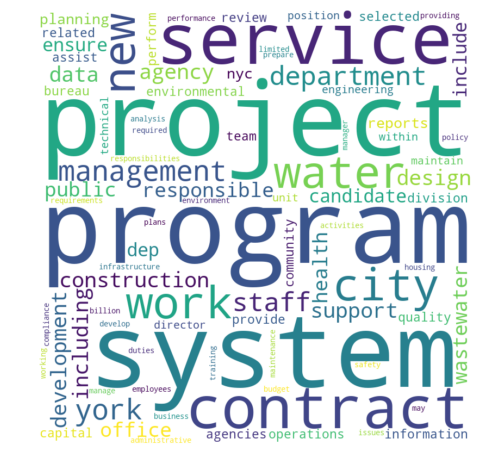

In [373]:
word_counts = [x[0] for x in Counter(job_kwords).most_common(100)]

#cloud showing Important Words in Job_Discription
generate_wordCloud(' '.join(word_counts))

# Skills Required

In [372]:
skills = data['Preferred Skills'].dropna()

main_skills = []

skills.apply(get_keywords, k = main_skills)


0       None
1       None
4       None
5       None
6       None
        ... 
3235    None
3236    None
3237    None
3238    None
3239    None
Name: Preferred Skills, Length: 2812, dtype: object

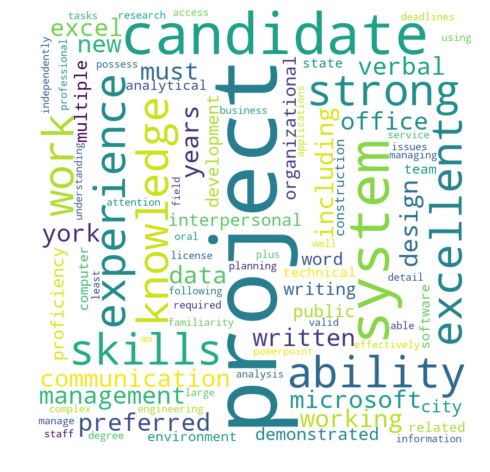

In [374]:

skill_counts = [x[0] for x in Counter(main_skills).most_common(100)]

#Cloud Showing the Important Skills Required for the Job 
generate_wordCloud(' '.join(skill_counts))
